In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

In [2]:
# debug the `KernelPCA.inverse_transform`
def inverse_transform(self, X, mean_shift=True):
    K = self._get_kernel(X, self.X_transformed_fit_)
    X_reconstructed = np.dot(K, self.dual_coef_)
    if (self.kernel=="linear") and mean_shift:
        X_reconstructed += self.X_fit_.mean(axis=0, keepdims=True)
    return X_reconstructed

KernelPCA.inverse_transform = inverse_transform

In [3]:
def experiment(n_components, kernel, mean_shift=True):
    X, _ = make_blobs(n_samples=100, centers=[[1, 1]], random_state=0)
    X_train, X_test = X[:90], X[90:]
    kp = KernelPCA(n_components=n_components, kernel=kernel, fit_inverse_transform=True)
    kp.fit(X_train)
    X_trans = kp.transform(X_test)
    X_inv = kp.inverse_transform(X_trans, mean_shift)

    plt.scatter(*zip(*X_test))
    plt.scatter(*zip(*X_inv))
    for x_inv, x_test in zip(X_inv, X_test):
        plt.plot([x_inv[0], x_test[0]], [x_inv[1], x_test[1]], 'k--', alpha=0.5)
    plt.show()

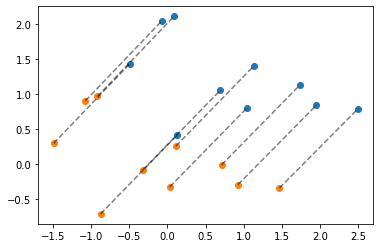

In [4]:
experiment(n_components=2, kernel='linear', mean_shift=False)

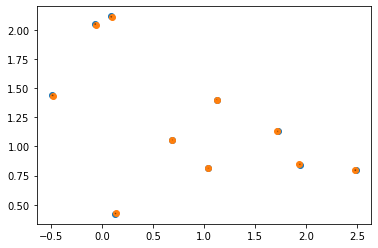

In [5]:
experiment(n_components=2, kernel='linear', mean_shift=True)

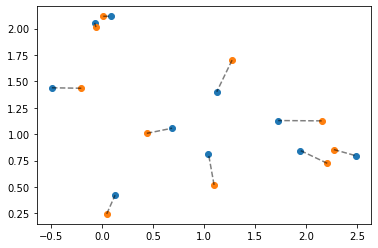

In [6]:
experiment(n_components=2, kernel='rbf')